# Dogs vs Cats

In [1]:
import plaidml.keras
plaidml.keras.install_backend()

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import scipy.ndimage
from keras.applications import inception_v3,vgg16
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'lab_5_dataset/train'
validation_data_dir = 'lab_5_dataset/validation'
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [18]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
{'cat': 0, 'dog': 1}
Found 5000 images belonging to 2 classes.


 #### ทำการ load data ด้วย datagen โดยที่ออกมาเป็นรูปแบบ binary โดยที่ 1 เป็นหมา และ 0 เป็นแมวไม่ใช่หมา
 ref : https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [33]:
NN00 = Sequential()
NN00.add(Conv2D(32, (3, 3), input_shape=input_shape))
NN00.add(Activation('relu'))
NN00.add(MaxPooling2D(pool_size=(2, 2)))

NN00.add(Conv2D(32, (3, 3)))
NN00.add(Activation('relu'))
NN00.add(MaxPooling2D(pool_size=(2, 2)))

NN00.add(Conv2D(64, (3, 3)))
NN00.add(Activation('relu'))
NN00.add(MaxPooling2D(pool_size=(2, 2)))

NN00.add(Flatten())
NN00.add(Dense(64))
NN00.add(Activation('relu'))
NN00.add(Dropout(0.5))
NN00.add(Dense(1))
NN00.add(Activation('sigmoid'))

In [34]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, verbose=1, mode='auto')
callbacks_list = [earlystop]
NN00.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])

In [35]:
NNfit00 = NN00.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NN00.save('model.h5')

Epoch 1/50
125/125 [==============================] - 92s 737ms/step - loss: 0.6951 - acc: 0.5180 - val_loss: 0.6904 - val_acc: 0.6026
Epoch 2/50
125/125 [==============================] - 109s 870ms/step - loss: 0.6889 - acc: 0.5335 - val_loss: 0.6637 - val_acc: 0.5998
Epoch 3/50
125/125 [==============================] - 111s 892ms/step - loss: 0.6846 - acc: 0.5530 - val_loss: 0.6833 - val_acc: 0.5290
Epoch 4/50
125/125 [==============================] - 107s 857ms/step - loss: 0.6884 - acc: 0.5545 - val_loss: 0.6786 - val_acc: 0.5138
Epoch 5/50
125/125 [==============================] - 186s 1s/step - loss: 0.6805 - acc: 0.5595 - val_loss: 0.6475 - val_acc: 0.6320
Epoch 6/50
125/125 [==============================] - 111s 888ms/step - loss: 0.6662 - acc: 0.6085 - val_loss: 0.6402 - val_acc: 0.6032
Epoch 7/50
125/125 [==============================] - 291s 2s/step - loss: 0.6392 - acc: 0.6375 - val_loss: 0.6087 - val_acc: 0.6584
Epoch 8/50
125/125 [==============================] - 1

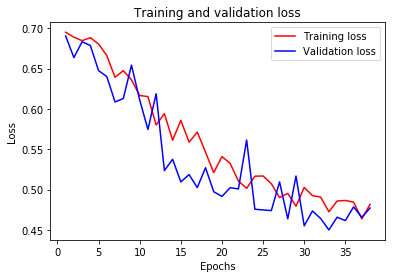

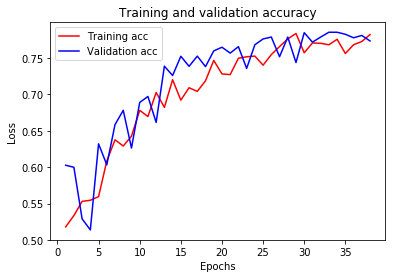

In [39]:
plot_loss_fn(NNfit00)
plot_acc_fn(NNfit00)

In [4]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3))

INFO:plaidml:Opening device "opencl_amd_hainan.0"


In [5]:
vgg.trainable = False
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
def CNN():
    x= Sequential()
    
    x.add(vgg)
    x.add(Flatten())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(1,activation='sigmoid',name='output'))
    return x

In [46]:
NN01 = CNN()
NN01.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])
NN01.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                524352    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
__________

In [47]:
NNfit01 = NN01.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NN01.save('model01.h5')

Epoch 1/50


INFO:plaidml:Analyzing Ops: 25 of 424 operations complete
INFO:plaidml:Analyzing Ops: 82 of 424 operations complete
INFO:plaidml:Analyzing Ops: 296 of 424 operations complete


124/125 [============================>.] - ETA: 1s - loss: 0.5364 - acc: 0.7812

INFO:plaidml:Analyzing Ops: 33 of 207 operations complete
INFO:plaidml:Analyzing Ops: 102 of 207 operations complete
INFO:plaidml:Analyzing Ops: 22 of 207 operations complete
INFO:plaidml:Analyzing Ops: 80 of 207 operations complete


125/125 [==============================] - 649s 5s/step - loss: 0.5348 - acc: 0.7820 - val_loss: 0.2914 - val_acc: 0.8778
Epoch 2/50
125/125 [==============================] - 607s 5s/step - loss: 0.3157 - acc: 0.8690 - val_loss: 0.2651 - val_acc: 0.8908
Epoch 3/50
125/125 [==============================] - 618s 5s/step - loss: 0.2884 - acc: 0.8740 - val_loss: 0.2764 - val_acc: 0.8818
Epoch 4/50
125/125 [==============================] - 616s 5s/step - loss: 0.2804 - acc: 0.8875 - val_loss: 0.2584 - val_acc: 0.8830
Epoch 5/50
125/125 [==============================] - 616s 5s/step - loss: 0.2879 - acc: 0.8735 - val_loss: 0.2444 - val_acc: 0.8946
Epoch 6/50
125/125 [==============================] - 616s 5s/step - loss: 0.2597 - acc: 0.8865 - val_loss: 0.2325 - val_acc: 0.9016
Epoch 7/50
125/125 [==============================] - 617s 5s/step - loss: 0.2801 - acc: 0.8810 - val_loss: 0.2338 - val_acc: 0.9056
Epoch 8/50
125/125 [==============================] - 619s 5s/step - loss: 0.269

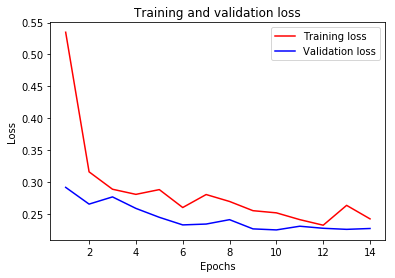

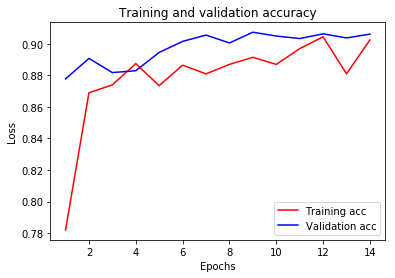

In [48]:
plot_loss_fn(NNfit01)
plot_acc_fn(NNfit01)

In [16]:
incep3= inception_v3.InceptionV3(include_top=False, weights='imagenet',input_shape=(150,150,3))

In [17]:
incep3.trainable = False
incep3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [57]:
def CNNincep():
    x= Sequential()
    
    x.add(incep3)
    x.add(Flatten())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(1,activation='sigmoid',name='output'))
    return x

In [58]:
NN02 = CNNincep()
NN02.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])
NN02.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_7 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                1179712   
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
__________

In [59]:
NNfit02 = NN02.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NN02.save('model02.h5')

Epoch 1/50


INFO:plaidml:Analyzing Ops: 89 of 1896 operations complete
INFO:plaidml:Analyzing Ops: 199 of 1896 operations complete
INFO:plaidml:Analyzing Ops: 366 of 1896 operations complete
INFO:plaidml:Analyzing Ops: 454 of 1896 operations complete
INFO:plaidml:Analyzing Ops: 754 of 1896 operations complete
INFO:plaidml:Analyzing Ops: 1338 of 1896 operations complete


124/125 [============================>.] - ETA: 1s - loss: 7.7674 - acc: 0.4955

INFO:plaidml:Analyzing Ops: 134 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 320 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 860 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 32 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 139 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 304 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 403 of 1201 operations complete
INFO:plaidml:Analyzing Ops: 976 of 1201 operations complete


125/125 [==============================] - 434s 3s/step - loss: 7.7432 - acc: 0.4950 - val_loss: 7.0041 - val_acc: 0.5228
Epoch 2/50
125/125 [==============================] - 281s 2s/step - loss: 3.2345 - acc: 0.5910 - val_loss: 0.2811 - val_acc: 0.9068
Epoch 3/50
125/125 [==============================] - 295s 2s/step - loss: 0.4902 - acc: 0.7790 - val_loss: 0.1654 - val_acc: 0.9414
Epoch 4/50
125/125 [==============================] - 314s 3s/step - loss: 0.3995 - acc: 0.8085 - val_loss: 0.2292 - val_acc: 0.9416
Epoch 5/50
125/125 [==============================] - 300s 2s/step - loss: 0.4055 - acc: 0.8195 - val_loss: 0.5661 - val_acc: 0.8644
Epoch 6/50
125/125 [==============================] - 277s 2s/step - loss: 0.3786 - acc: 0.8285 - val_loss: 0.3884 - val_acc: 0.9274
Epoch 7/50
125/125 [==============================] - 271s 2s/step - loss: 0.3481 - acc: 0.8465 - val_loss: 0.2772 - val_acc: 0.9192
Epoch 8/50
125/125 [==============================] - 284s 2s/step - loss: 0.367

digraph Tile {
  n1 [label="out\ntraining\/training\/Adam\/training\/training\/Adam\/training\/training\/Adam\/zeros_281\ Tensor\ FLOAT32\(64\,\ 64\)" shape=doublecircle];
}


KeyboardInterrupt: 

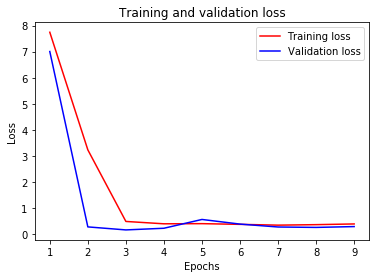

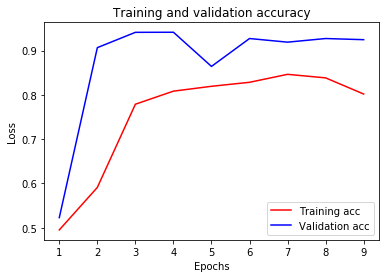

In [60]:
plot_loss_fn(NNfit02)
plot_acc_fn(NNfit02)

In [14]:
def CNNbatch():
    x= Sequential()
    
    x.add(incep3)
    x.add(Flatten())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(1,activation='sigmoid',name='output'))
    return x

In [63]:
NN03 = CNNbatch()
NN03.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])
NN03.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                1179712   
_________________________________________________________________
batch_normalization_95 (Batc (None, 64)                256       
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_96 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
__________

In [64]:
NNfit03 = NN03.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NN03.save('model03.h5')

Epoch 1/50


INFO:plaidml:Analyzing Ops: 173 of 2238 operations complete
INFO:plaidml:Analyzing Ops: 319 of 2238 operations complete
INFO:plaidml:Analyzing Ops: 447 of 2238 operations complete
INFO:plaidml:Analyzing Ops: 632 of 2238 operations complete
INFO:plaidml:Analyzing Ops: 1209 of 2238 operations complete
INFO:plaidml:Analyzing Ops: 1600 of 2238 operations complete


124/125 [============================>.] - ETA: 1s - loss: 0.5727 - acc: 0.7117

INFO:plaidml:Analyzing Ops: 120 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 233 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 377 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 1013 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 134 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 306 of 1233 operations complete
INFO:plaidml:Analyzing Ops: 580 of 1233 operations complete


125/125 [==============================] - 402s 3s/step - loss: 0.5722 - acc: 0.7115 - val_loss: 0.3124 - val_acc: 0.9240
Epoch 2/50
125/125 [==============================] - 276s 2s/step - loss: 0.4386 - acc: 0.7855 - val_loss: 0.2427 - val_acc: 0.9336
Epoch 3/50
125/125 [==============================] - 279s 2s/step - loss: 0.4215 - acc: 0.7985 - val_loss: 0.3346 - val_acc: 0.9222
Epoch 4/50
125/125 [==============================] - 277s 2s/step - loss: 0.4297 - acc: 0.7970 - val_loss: 0.5186 - val_acc: 0.9064
Epoch 5/50
125/125 [==============================] - 256s 2s/step - loss: 0.3682 - acc: 0.8250 - val_loss: 0.5442 - val_acc: 0.9076
Epoch 6/50
125/125 [==============================] - 257s 2s/step - loss: 0.3854 - acc: 0.8270 - val_loss: 0.2549 - val_acc: 0.9388
Epoch 7/50
125/125 [==============================] - 256s 2s/step - loss: 0.3774 - acc: 0.8260 - val_loss: 0.2653 - val_acc: 0.9356
Epoch 8/50
125/125 [==============================] - 260s 2s/step - loss: 0.367

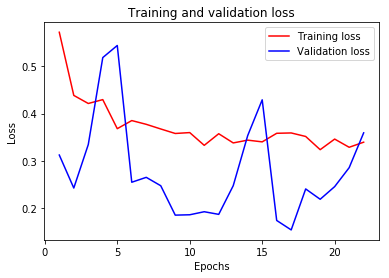

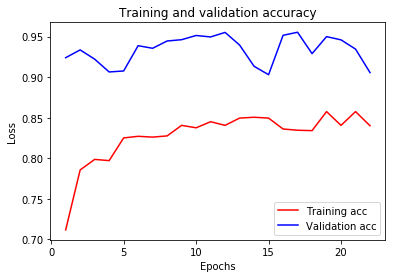

In [66]:
plot_loss_fn(NNfit03)
plot_acc_fn(NNfit03)

In [6]:
def CNNbatchVGG():
    x= Sequential()
    
    x.add(vgg)
    x.add(Flatten())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(BatchNormalization())
    x.add(Dense(64,activation='relu', kernel_initializer='he_uniform'))
    x.add(Dense(1,activation='sigmoid',name='output'))
    return x

In [68]:
NN04 = CNNbatchVGG()
NN04.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])
NN04.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                524352    
_________________________________________________________________
batch_normalization_99 (Batc (None, 64)                256       
_________________________________________________________________
dense_36 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_100 (Bat (None, 64)                256       
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
__________

In [69]:
NNfit04 = NN04.fit_generator(
    train_generator,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NN04.save('model04.h5')

Epoch 1/50


INFO:plaidml:Analyzing Ops: 24 of 768 operations complete
INFO:plaidml:Analyzing Ops: 58 of 768 operations complete
INFO:plaidml:Analyzing Ops: 92 of 768 operations complete
INFO:plaidml:Analyzing Ops: 137 of 768 operations complete


124/125 [============================>.] - ETA: 1s - loss: 0.4673 - acc: 0.7727

INFO:plaidml:Analyzing Ops: 33 of 240 operations complete
INFO:plaidml:Analyzing Ops: 101 of 240 operations complete
INFO:plaidml:Analyzing Ops: 16 of 240 operations complete
INFO:plaidml:Analyzing Ops: 33 of 240 operations complete
INFO:plaidml:Analyzing Ops: 90 of 240 operations complete


125/125 [==============================] - 682s 5s/step - loss: 0.4692 - acc: 0.7730 - val_loss: 0.6685 - val_acc: 0.7068
Epoch 2/50
125/125 [==============================] - 617s 5s/step - loss: 0.3733 - acc: 0.8325 - val_loss: 0.3827 - val_acc: 0.8328
Epoch 3/50
125/125 [==============================] - 608s 5s/step - loss: 0.3475 - acc: 0.8505 - val_loss: 0.2726 - val_acc: 0.8892
Epoch 4/50
125/125 [==============================] - 609s 5s/step - loss: 0.3379 - acc: 0.8595 - val_loss: 0.2630 - val_acc: 0.8930
Epoch 5/50
125/125 [==============================] - 623s 5s/step - loss: 0.3335 - acc: 0.8510 - val_loss: 0.2585 - val_acc: 0.8932
Epoch 6/50
125/125 [==============================] - 620s 5s/step - loss: 0.2941 - acc: 0.8785 - val_loss: 0.2605 - val_acc: 0.8930
Epoch 7/50
125/125 [==============================] - 620s 5s/step - loss: 0.2946 - acc: 0.8750 - val_loss: 0.2492 - val_acc: 0.9004
Epoch 8/50
125/125 [==============================] - 621s 5s/step - loss: 0.291

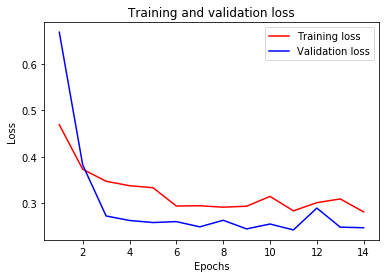

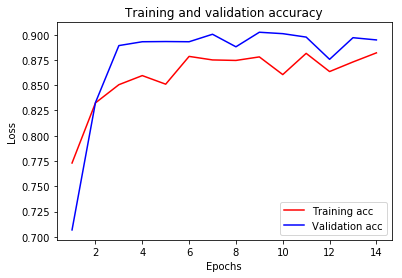

In [70]:
plot_loss_fn(NNfit04)
plot_acc_fn(NNfit04)

#### ทำการสร้าง model 5 รูปแบบ ดังนี้
#### 1. CNN ธรรมดาไม่กี่ layers
#### 2.transfer learning จาก vgg16
#### 3.transfer learning จาก vgg16 โดยที่มีการทำ batch norm เพื่อเร่งอัตราการเรียนรู้
#### 4.transfer learning จาก inception_v3
#### 5.transfer learning จาก inception_v3 โดยที่มีการทำ batch norm เพื่อเร่งอัตราการเรียนรู้
batchnorm : https://arxiv.org/abs/1502.03167

#### เปรียบเทียบ ค่าความแม่นยำและ validation curve และนำ model นั้นมาทำการ train ด้วย data augmentation
ref : https://github.com/jkjung-avt/keras-cats-dogs-tutorial

In [7]:
train_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_width, img_height),
                                                  interpolation='bicubic',
                                                  class_mode='binary',
                                                  shuffle=True,
                                                  batch_size=batch_size)

valid_datagen = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input)
valid_batches = valid_datagen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width, img_height),
                                                  interpolation='bicubic',
                                                  class_mode='binary',
                                                  shuffle=False,
                                                  batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, verbose=1, mode='auto')
callbacks_list = [earlystop]

In [9]:
NNdb = CNNbatchVGG()
NNdb.compile(loss='binary_crossentropy',
              optimizer=opt,
               metrics=['accuracy'])
NNdb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
__________

In [10]:
NNfitdb = NNdb.fit_generator(
    train_batches,
    steps_per_epoch= 2000 // batch_size,
    epochs=50,
    validation_data=valid_batches,
    validation_steps= 800 // batch_size,callbacks=callbacks_list)

NNdb.save('modeldb.h5')

Epoch 1/50


INFO:plaidml:Analyzing Ops: 16 of 768 operations complete
INFO:plaidml:Analyzing Ops: 35 of 768 operations complete
INFO:plaidml:Analyzing Ops: 81 of 768 operations complete
INFO:plaidml:Analyzing Ops: 103 of 768 operations complete


124/125 [============================>.] - ETA: 1s - loss: 0.3872 - acc: 0.8120

INFO:plaidml:Analyzing Ops: 33 of 240 operations complete
INFO:plaidml:Analyzing Ops: 90 of 240 operations complete
INFO:plaidml:Analyzing Ops: 33 of 240 operations complete
INFO:plaidml:Analyzing Ops: 101 of 240 operations complete


125/125 [==============================] - 671s 5s/step - loss: 0.3877 - acc: 0.8120 - val_loss: 0.1780 - val_acc: 0.9304
Epoch 2/50
125/125 [==============================] - 616s 5s/step - loss: 0.2599 - acc: 0.8940 - val_loss: 0.1124 - val_acc: 0.9586
Epoch 3/50
125/125 [==============================] - 630s 5s/step - loss: 0.2144 - acc: 0.9140 - val_loss: 0.1026 - val_acc: 0.9602
Epoch 4/50
125/125 [==============================] - 632s 5s/step - loss: 0.2130 - acc: 0.9185 - val_loss: 0.0976 - val_acc: 0.9628
Epoch 5/50
125/125 [==============================] - 620s 5s/step - loss: 0.2240 - acc: 0.9050 - val_loss: 0.1277 - val_acc: 0.9592
Epoch 6/50
125/125 [==============================] - 620s 5s/step - loss: 0.1888 - acc: 0.9250 - val_loss: 0.1059 - val_acc: 0.9608
Epoch 7/50
125/125 [==============================] - 620s 5s/step - loss: 0.2019 - acc: 0.9210 - val_loss: 0.1006 - val_acc: 0.9640
Epoch 8/50
125/125 [==============================] - 612s 5s/step - loss: 0.196

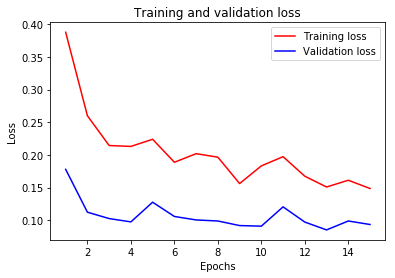

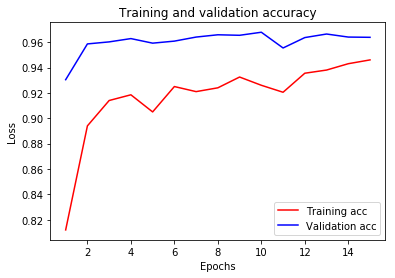

In [11]:
plot_loss_fn(NNfitdb)
plot_acc_fn(NNfitdb)

##### เมื่อตรวจสอบ graph จะได้ค่าความแม่นยำมากว่า 90 % ตามที่ต้องการแต่ตัว model ยัง under fit อยู่

In [24]:
scores = NNdb.evaluate_generator(valid_batches,verbose = 1)

313/313 [==============================] - 452s 1s/step


In [25]:
print("Loss" ,scores[0],"\n","Accuracy",scores[1])

Train 0.09359860901460051 
 Validation 0.9638


In [27]:
tamnai = NNdb.predict_generator(valid_batches, verbose=1)

312/313 [============================>.] - ETA: 1s

INFO:plaidml:Analyzing Ops: 32 of 208 operations complete
INFO:plaidml:Analyzing Ops: 100 of 208 operations complete


313/313 [==============================] - 450s 1s/step


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print('Confusion Matrix')
print(confusion_matrix(valid_batches.classes, tamnai.round()))
print('Classification Report')
print(classification_report(valid_batches.classes, tamnai.round()))

Confusion Matrix
[[2375  125]
 [  56 2444]]
Classification Report
             precision    recall  f1-score   support

          0       0.98      0.95      0.96      2500
          1       0.95      0.98      0.96      2500

avg / total       0.96      0.96      0.96      5000



##### หลังจากนั้นทำการ evaluate model และทำนายผลออกมาทำ  Classification และ Report  Confusion Matrix ซึ้งออกมามากกว่า 95 %
*1 เป็นหมา 0 ไม่ใช่หมา (แมว)